<a href="https://colab.research.google.com/github/Jayneshtandel/Case-Study--Intelligence-System-In-Production-Group-B-/blob/main/intelligence_system_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Load the dataset and do basic inspection
🔍 Goal:

Read the CSV

Check the structure (rows, columns)

View sample rows

In [ ]:
import pandas as pd

# Load dataset
file_path = "DataCoSupplyChainDataset.csv"  # If in Colab, you can upload or mount Drive
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Basic info
print("Shape of dataset:", df.shape)
print("Column names:\n", df.columns.tolist())

# Preview first 5 rows
df.head()


Shape of dataset: (180519, 53)
Column names:
 ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Pric

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


STEP 2: Parse Date Columns and Compute Lead Time Metrics
🔍 Goal:
**bold text**
Convert date strings into datetime format

Create new columns:

Actual Lead Time = how many days delivery took

Scheduled Lead Time = how many days were promised

Lead Time Variance = actual - scheduled

**Explanation:**

We converted both date columns so we can work with them easily

We explicitly named new columns so your model can learn from:

Lead Time (Actual): How long it actually took

Lead Time (Scheduled): What was promised

Lead Time Variance: How late (or early) the delivery was

We cleaned rows where dates were missing to avoid errors in plotting or training

In [ ]:
# Convert order and shipping date strings to datetime
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

# Create meaningful lead time columns
df['Lead Time (Actual)'] = df['Days for shipping (real)']
df['Lead Time (Scheduled)'] = df['Days for shipment (scheduled)']
df['Lead Time Variance'] = df['Lead Time (Actual)'] - df['Lead Time (Scheduled)']

# Drop rows with invalid dates (NaT values)
df = df.dropna(subset=['Order Date', 'Ship Date'])


STEP 3: Visualize Lead Time Patterns Over Time
🔍 Goal: **bold text****bold text**

Plot actual vs scheduled lead time over time

See how lead time changes chronologically

Explanation:
**bold text**
This plot helps us visually compare what was promised vs what actually happened

The gap between lines indicates how often deliveries are early, on time, or delayed

Trends or seasonal issues (e.g. spikes in holidays) can become visible



/tmp/ipython-input-2305095161.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


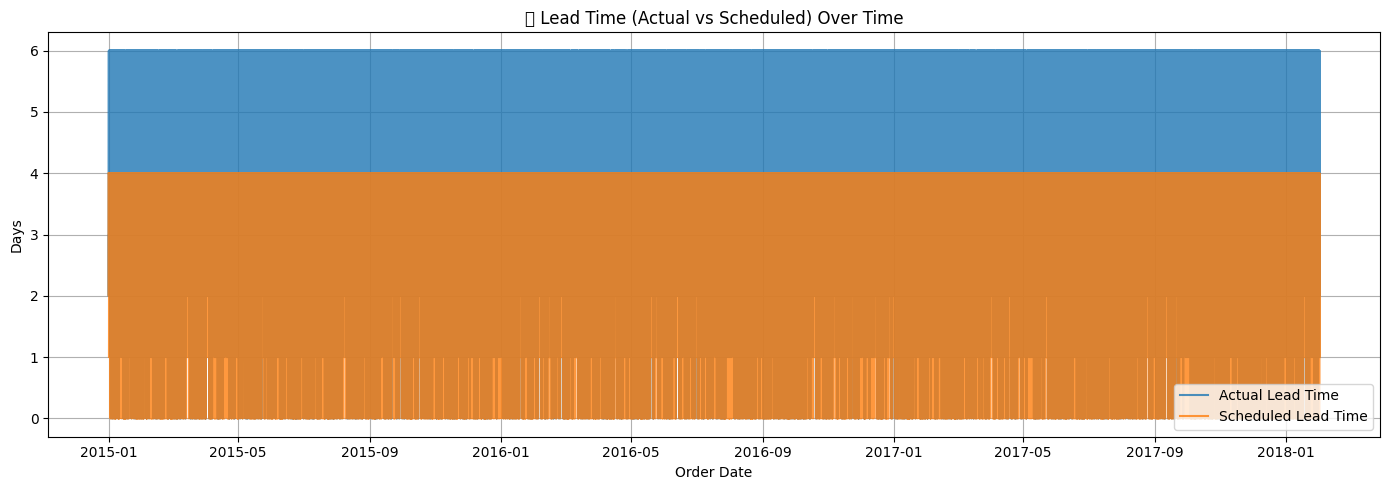

In [ ]:
import matplotlib.pyplot as plt

# Sort by order date for plotting
df_sorted = df.sort_values('Order Date')

# Plot: Actual vs Scheduled Lead Time Over Time
plt.figure(figsize=(14, 5))
plt.plot(df_sorted['Order Date'], df_sorted['Lead Time (Actual)'], label='Actual Lead Time', alpha=0.8)
plt.plot(df_sorted['Order Date'], df_sorted['Lead Time (Scheduled)'], label='Scheduled Lead Time', alpha=0.8)

plt.title('📦 Lead Time (Actual vs Scheduled) Over Time')
plt.xlabel('Order Date')
plt.ylabel('Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


STEP 4: Visualize Lead Time Variance (Delays and Early Deliveries)
🔍 Goal: **bold text**

Plot a histogram of Lead Time Variance

Understand how frequently deliveries are early, late, or on time

**Explanation:**

Negative values → Early deliveries

Zero → On time

Positive values → Late deliveries

KDE curve (smooth line) helps visualize the density

This helps identify how common late deliveries are and how far they usually go beyond the scheduled time.

/tmp/ipython-input-2094459361.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


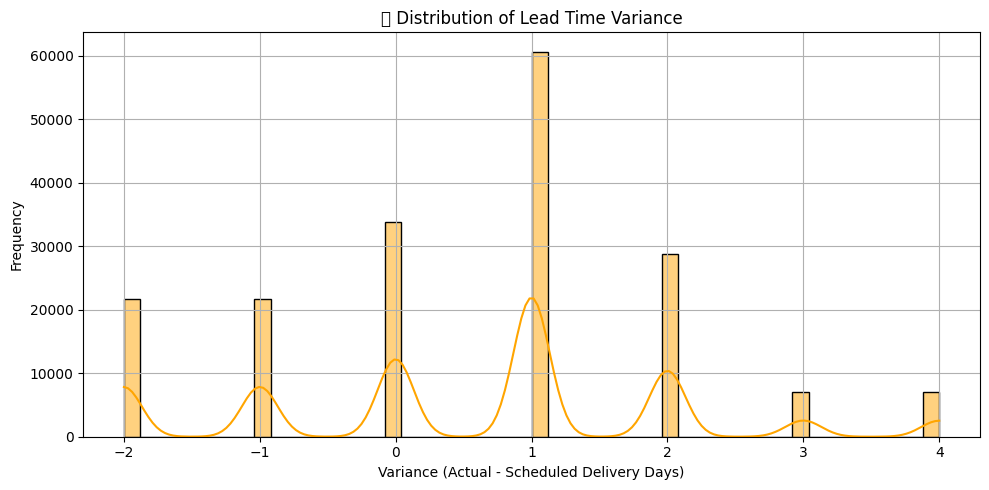

In [ ]:
import seaborn as sns

# Histogram of Lead Time Variance
plt.figure(figsize=(10, 5))
sns.histplot(df['Lead Time Variance'], bins=50, kde=True, color='orange')

plt.title('📊 Distribution of Lead Time Variance')
plt.xlabel('Variance (Actual - Scheduled Delivery Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


STEP 5: Late Delivery Risk by Shipping Mode
🔍 Goal:
**bold text**
Use a count plot to compare how often each shipping method results in a late delivery

Column to use: Late_delivery_risk (0 = on time, 1 = late)
Explanation: **bold text**

This shows how each shipping mode performs in terms of on-time delivery

You’ll likely see Standard Class with more delays compared to Same Day or First Class

This is useful for your model later — Shipping Mode will be a key input feature

/tmp/ipython-input-2964718551.py:9: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


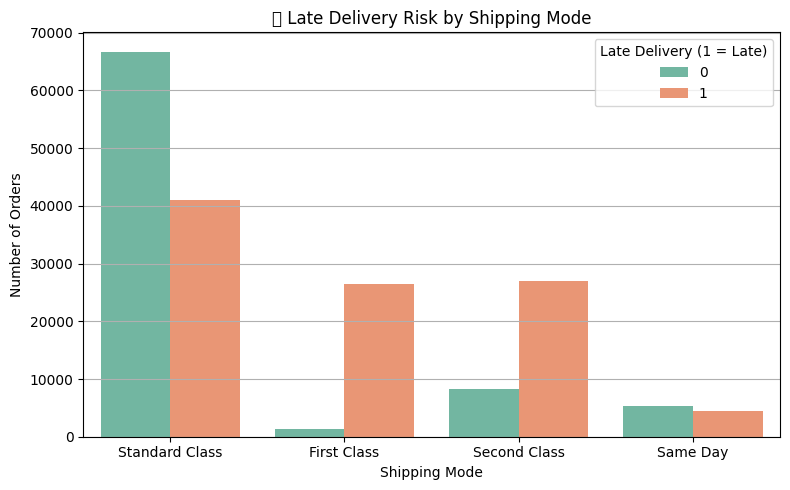

In [ ]:
# Count of Late vs On-Time Deliveries by Shipping Mode
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Shipping Mode', hue='Late_delivery_risk', palette='Set2')

plt.title('🚚 Late Delivery Risk by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.legend(title='Late Delivery (1 = Late)', loc='upper right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


STEP 6 (Updated): Prepare Features and Target for Modeling
🔍 Goal: **bold text**

Select relevant features

Encode categorical variables

Scale numeric ones

Create feature matrix X and target vector y
**Explanation:**

One-hot encoding is now done with toarray() for compatibility

You now have X (input features) and y (target) ready

It works regardless of your scikit-learn version



In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# 🎯 Target: change this line for forecasting or classification
target_col = 'Lead Time (Actual)'  # or use 'Late_delivery_risk' for binary classification

# ✅ Selected features (feel free to extend this list)
feature_cols = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer'
]

# Filter the needed columns
df_model = df[feature_cols + [target_col]].dropna().copy()

# ✅ One-hot encode categorical features
cat_cols = ['Shipping Mode', 'Market']
encoder = OneHotEncoder(drop='first')  # sparse_output=False is not needed in older versions
encoded_arr = encoder.fit_transform(df_model[cat_cols]).toarray()
encoded_feature_names = encoder.get_feature_names_out(cat_cols)

# ✅ Normalize numeric features
num_cols = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Sales per customer']
scaler = StandardScaler()
scaled_arr = scaler.fit_transform(df_model[num_cols])

# ✅ Combine numeric + encoded categorical
X = np.hstack([scaled_arr, encoded_arr])
y = df_model[target_col].values

# ✅ Wrap into DataFrame for inspection
X_df = pd.DataFrame(X, columns=list(num_cols) + list(encoded_feature_names))

print("✅ Feature matrix shape:", X.shape)
print("✅ Target shape:", y.shape)
X_df.head()


✅ Feature matrix shape: (180519, 10)
✅ Target shape: (180519,)


,Days for shipment (scheduled),Order Item Quantity,Sales per customer,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,0.777152,-0.775836,1.095708,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.777152,-0.775836,1.068384,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.777152,-0.775836,1.054722,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.777152,-0.775836,1.013820,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.777152,-0.775836,0.959174,0.0,0.0,1.0,0.0,0.0,1.0,0.0


STEP 7: Train a CNN–BiLSTM Model to Predict Lead Time
🔍 Goal:
**bold text**
Use the features from Step 6 to build a hybrid CNN + Bidirectional LSTM model that predicts lead time.
Explanation:
**bold text**
We're reshaping each row as a 1-step time-series input: this allows us to reuse CNN+BiLSTM now and later scale up to sequences

The CNN layers help extract local patterns (like grouped inputs)

The BiLSTM captures temporal context (right now it's minimal, but this sets the structure)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Reshape input to 3D: [samples, time_steps, features]
# We'll treat each sample as a single-step sequence for now (can expand later)
X_seq = X.reshape((X.shape[0], 1, X.shape[1]))  # [N, 1, features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# ✅ Build CNN-BiLSTM model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Conv1D(32, kernel_size=1, activation='relu'),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.2),
    layers.Dense(1)  # output: lead time (regression)
])

model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# ✅ Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=128, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 3.3158 - rmse: 1.7556 - val_loss: 1.6010 - val_rmse: 1.2653
Epoch 2/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.6446 - rmse: 1.2824 - val_loss: 1.6033 - val_rmse: 1.2662
Epoch 3/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.6332 - rmse: 1.2780 - val_loss: 1.5914 - val_rmse: 1.2615
Epoch 4/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.6346 - rmse: 1.2785 - val_loss: 1.5906 - val_rmse: 1.2612
Epoch 5/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.6357 - rmse: 1.2789 - val_loss: 1.5948 - val_rmse: 1.2629
Epoch 6/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.6470 - rmse: 1.2834 - val_loss: 1.5912 - val_rmse: 1.2614
Epoch 7/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1.6264 - rmse: 1.2753 - val_loss: 1.5937 - val_rmse: 1.2624
Epoch 8/15
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.6360 - rmse: 1.2790 - val_loss: 1.5889 - val_rmse: 1.2605
Epoch 9/15
1016

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# Select new feature set
feature_cols = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer', 'Order Region',
    'Department Name', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Profit Ratio'
]

target_col = 'Lead Time (Actual)'

# Drop nulls
df_model = df[feature_cols + [target_col]].dropna()

# One-hot encode categoricals
cat_cols = ['Shipping Mode', 'Market', 'Order Region', 'Department Name']
encoder = OneHotEncoder(drop='first')
X_cat = encoder.fit_transform(df_model[cat_cols]).toarray()
cat_names = encoder.get_feature_names_out(cat_cols)

# Scale numerics
num_cols = list(set(feature_cols) - set(cat_cols))
scaler = StandardScaler()
X_num = scaler.fit_transform(df_model[num_cols])

# Final input features
X = np.hstack([X_num, X_cat])
y = df_model[target_col].values

# Reshape for sequence input [samples, time_steps, features]
X_seq = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# Build improved CNN-BiLSTM model
model = models.Sequential([
    layers.Input(shape=(1, X.shape[1])),
    layers.Conv1D(64, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=1, activation='relu'),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=64, verbose=1)


Epoch 1/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 2.1094 - rmse: 1.4317 - val_loss: 1.6021 - val_rmse: 1.2657
Epoch 2/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6449 - rmse: 1.2825 - val_loss: 1.5989 - val_rmse: 1.2645
Epoch 3/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.6474 - rmse: 1.2835 - val_loss: 1.6135 - val_rmse: 1.2702
Epoch 4/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6334 - rmse: 1.2780 - val_loss: 1.5957 - val_rmse: 1.2632
Epoch 5/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 1.6396 - rmse: 1.2805 - val_loss: 1.5939 - val_rmse: 1.2625
Epoch 6/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 1.6282 - rmse: 1.2760 - val_loss: 1.6041 - val_rmse: 1.2665
Epoch 7/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 1.6265 - rmse: 1.2753 - val_loss: 1.5917 - val_rmse: 1.2616
Epoch 8/20
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6334 - rmse: 1.2780 - val_loss: 1.5930 - val_rmse: 1.2622
Epoch 9/

Dual Modeling Strategy
▶️ Option 1: Regression

🎯 Predict exact lead time

📈 Metrics: RMSE, MAE, residual plots

🧠 Model: CNN–BiLSTM (you’ve already built this!)

▶️ Option 2: Classification

🎯 Predict whether a delivery will be late

📊 Metrics: Accuracy, Precision, Recall, F1, Confusion Matrix

🧠 Model: CNN–BiLSTM (different loss function & output layer)

This lets you:

Build a forecasting tool for managers who need exact timing

Also build a risk alert system that flags late shipments early

💡 How to Organize Your Project:
Part	Goal	Target	Model	Evaluation
A	Lead Time Forecasting	Lead Time (Actual)	CNN–BiLSTM	RMSE, MAE, Residuals
B	Late Risk Detection	Late_delivery_risk	CNN–BiLSTM	Precision, Recall, F1, Confusion Matrix

Epoch 1/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 2.0869 - rmse: 1.4244 - val_loss: 1.5982 - val_rmse: 1.2642
Epoch 2/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6490 - rmse: 1.2841 - val_loss: 1.6013 - val_rmse: 1.2654
Epoch 3/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6439 - rmse: 1.2822 - val_loss: 1.5910 - val_rmse: 1.2613
Epoch 4/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 1.6393 - rmse: 1.2803 - val_loss: 1.5913 - val_rmse: 1.2615
Epoch 5/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 1.6380 - rmse: 1.2798 - val_loss: 1.5947 - val_rmse: 1.2628
Epoch 6/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 1.6339 - rmse: 1.2782 - val_loss: 1.6042 - val_rmse: 1.2666
Epoch 7/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6385 - rmse: 1.2800 - val_loss: 1.6040 - val_rmse: 1.2665
Epoch 8/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 1.6352 - rmse: 1.2788 - val_loss: 1.5934 - val_rmse: 1.2623
Epoch 9/

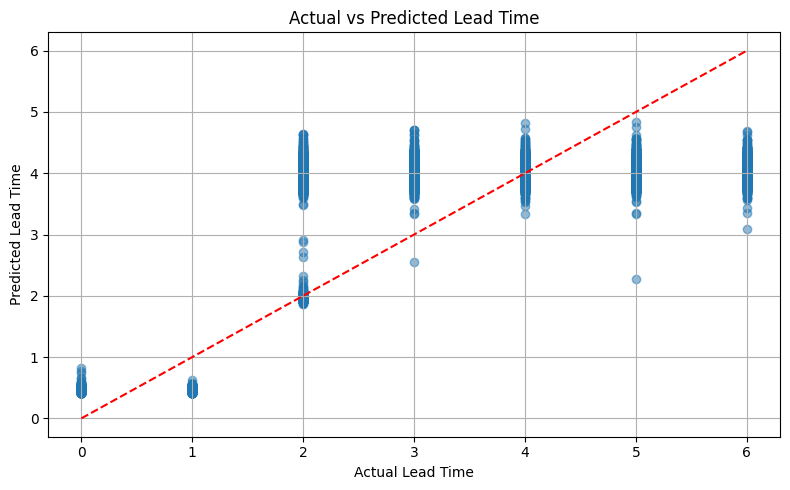

Epoch 1/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6810 - loss: 0.5977 - val_accuracy: 0.6997 - val_loss: 0.5675
Epoch 2/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6936 - loss: 0.5690 - val_accuracy: 0.7003 - val_loss: 0.5683
Epoch 3/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6961 - loss: 0.5669 - val_accuracy: 0.6993 - val_loss: 0.5683
Epoch 4/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6950 - loss: 0.5696 - val_accuracy: 0.6995 - val_loss: 0.5675
Epoch 5/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6949 - loss: 0.5690 - val_accuracy: 0.6991 - val_loss: 0.5674
Epoch 6/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6943 - loss: 0.5676 - val_accuracy: 0.6991 - val_loss: 0.5678
Epoch 7/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6967 - loss: 0.5678 - val_accuracy: 0.7001 - val_loss: 0.5683
Epoch 8/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6975 - loss: 0

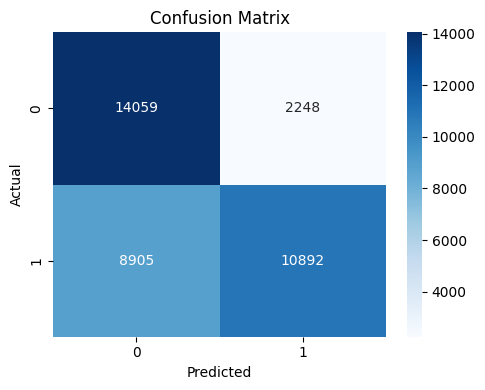

In [ ]:
# === SUPPLY CHAIN DUAL MODELING PIPELINE ===
# 📦 CNN-BiLSTM for Regression + Classification in Supply Chain

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

# === Load Dataset ===
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

# === Parse Dates and Lead Time ===
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')
df['Lead Time (Actual)'] = df['Days for shipping (real)']
df['Lead Time (Scheduled)'] = df['Days for shipment (scheduled)']
df['Lead Time Variance'] = df['Lead Time (Actual)'] - df['Lead Time (Scheduled)']
df.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

# === Shared Feature List ===
features = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer', 'Order Region',
    'Department Name', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Profit Ratio'
]

# === Categorical Columns ===
cat_cols = ['Shipping Mode', 'Market', 'Order Region', 'Department Name']

# === STEP A: Regression Model (Lead Time Forecasting) ===
reg_df = df[features + ['Lead Time (Actual)']].dropna()
enc = OneHotEncoder(drop='first')
X_cat = enc.fit_transform(reg_df[cat_cols]).toarray()
scaler = StandardScaler()
X_num = scaler.fit_transform(reg_df[[col for col in features if col not in cat_cols]])
X_reg = np.hstack([X_num, X_cat])
y_reg = reg_df['Lead Time (Actual)'].values
X_seq_reg = X_reg.reshape((X_reg.shape[0], 1, X_reg.shape[1]))
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_seq_reg, y_reg, test_size=0.2, random_state=42)

model_reg = models.Sequential([
    layers.Input(shape=(1, X_reg.shape[1])),
    layers.Conv1D(64, 1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
model_reg.fit(Xr_train, yr_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Regression Evaluation ===
ypred_reg = model_reg.predict(Xr_test).flatten()
print("\n📈 REGRESSION METRICS")
print("RMSE:", np.sqrt(mean_squared_error(yr_test, ypred_reg)))
print("MAE:", mean_absolute_error(yr_test, ypred_reg))

plt.figure(figsize=(8, 5))
plt.scatter(yr_test, ypred_reg, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel('Actual Lead Time')
plt.ylabel('Predicted Lead Time')
plt.title('Actual vs Predicted Lead Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP B: Classification Model (Late Delivery Risk) ===
cls_df = df[features + ['Late_delivery_risk']].dropna()
X_cat_cls = enc.transform(cls_df[cat_cols]).toarray()
X_num_cls = scaler.transform(cls_df[[col for col in features if col not in cat_cols]])
X_cls = np.hstack([X_num_cls, X_cat_cls])
y_cls = cls_df['Late_delivery_risk'].values
X_seq_cls = X_cls.reshape((X_cls.shape[0], 1, X_cls.shape[1]))
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_seq_cls, y_cls, test_size=0.2, random_state=42)

model_cls = models.Sequential([
    layers.Input(shape=(1, X_cls.shape[1])),
    layers.Conv1D(32, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cls.fit(Xc_train, yc_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Classification Evaluation ===
yc_pred_prob = model_cls.predict(Xc_test).flatten()
yc_pred = (yc_pred_prob > 0.5).astype(int)
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(yc_test, yc_pred, digits=4))

cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**Step C — Anomaly Detection with LSTM Autoencoder**

This will help you identify unusual shipping patterns, such as:

Abnormally high lead time

Orders with strange profit/loss behavior

Outlier delivery performance (even if not marked "late")

🧠 **What’s an LSTM Autoencoder?**

It learns the “normal” pattern of sequences (e.g. shipping behavior)

Then it reconstructs inputs →

Epoch 1/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 2.0936 - rmse: 1.4253 - val_loss: 1.6004 - val_rmse: 1.2651
Epoch 2/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 1.6475 - rmse: 1.2835 - val_loss: 1.6611 - val_rmse: 1.2889
Epoch 3/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 1.6427 - rmse: 1.2817 - val_loss: 1.6086 - val_rmse: 1.2683
Epoch 4/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 1.6419 - rmse: 1.2813 - val_loss: 1.6018 - val_rmse: 1.2656
Epoch 5/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 1.6327 - rmse: 1.2778 - val_loss: 1.6024 - val_rmse: 1.2658
Epoch 6/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 1.6372 - rmse: 1.2795 - val_loss: 1.5981 - val_rmse: 1.2641
Epoch 7/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 1.6439 - rmse: 1.2821 - val_loss: 1.6035 - val_rmse: 1.2663
Epoch 8/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 1.6284 - rmse: 1.2761 - val_loss: 1.5952 - val_rmse: 1.2630
Epoch 9/

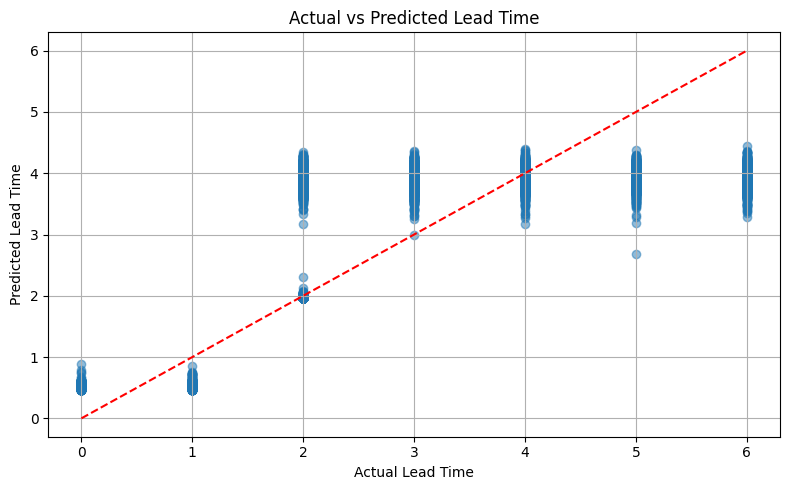

Epoch 1/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6822 - loss: 0.5930 - val_accuracy: 0.6999 - val_loss: 0.5680
Epoch 2/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6953 - loss: 0.5696 - val_accuracy: 0.7006 - val_loss: 0.5676
Epoch 3/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6935 - loss: 0.5697 - val_accuracy: 0.6994 - val_loss: 0.5673
Epoch 4/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6984 - loss: 0.5653 - val_accuracy: 0.7006 - val_loss: 0.5678
Epoch 5/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6962 - loss: 0.5686 - val_accuracy: 0.7003 - val_loss: 0.5672
Epoch 6/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6941 - loss: 0.5695 - val_accuracy: 0.6991 - val_loss: 0.5670
Epoch 7/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6980 - loss: 0.5661 - val_accuracy: 0.7004 - val_loss: 0.5680
Epoch 8/15
2031/2031 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6929 - loss: 0

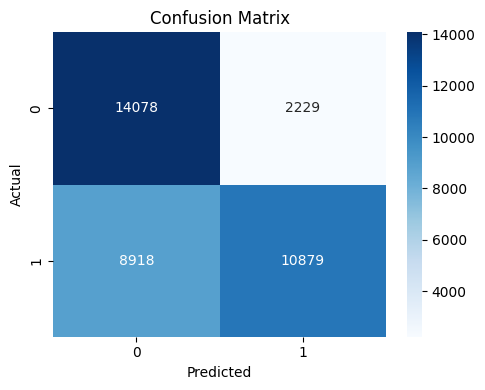

Epoch 1/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.1081 - val_loss: 0.0190
Epoch 2/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0165 - val_loss: 0.0103
Epoch 3/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0085 - val_loss: 0.0043
Epoch 4/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 5/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 6/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/7
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0014 - val_loss: 0.0010
5642/5642 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step


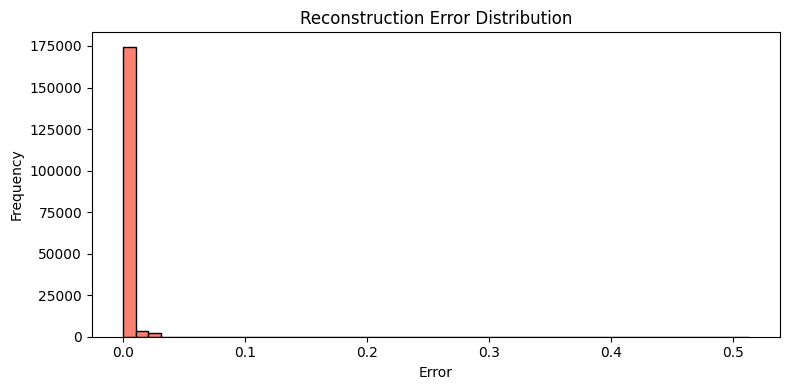


Top anomalies flagged: 3611


In [ ]:
# === SUPPLY CHAIN DUAL MODELING PIPELINE WITH ANOMALY DETECTION ===
# 📦 CNN-BiLSTM for Regression + Classification + LSTM Autoencoder for Anomaly Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

# === Load Dataset ===
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

# === Parse Dates and Lead Time ===
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')
df['Lead Time (Actual)'] = df['Days for shipping (real)']
df['Lead Time (Scheduled)'] = df['Days for shipment (scheduled)']
df['Lead Time Variance'] = df['Lead Time (Actual)'] - df['Lead Time (Scheduled)']
df.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

# === Shared Feature List ===
features = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer', 'Order Region',
    'Department Name', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Profit Ratio'
]

# === Categorical Columns ===
cat_cols = ['Shipping Mode', 'Market', 'Order Region', 'Department Name']

# === STEP A: Regression Model (Lead Time Forecasting) ===
reg_df = df[features + ['Lead Time (Actual)']].dropna()
enc = OneHotEncoder(drop='first')
X_cat = enc.fit_transform(reg_df[cat_cols]).toarray()
scaler = StandardScaler()
X_num = scaler.fit_transform(reg_df[[col for col in features if col not in cat_cols]])
X_reg = np.hstack([X_num, X_cat])
y_reg = reg_df['Lead Time (Actual)'].values
X_seq_reg = X_reg.reshape((X_reg.shape[0], 1, X_reg.shape[1]))
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_seq_reg, y_reg, test_size=0.2, random_state=42)

model_reg = models.Sequential([
    layers.Input(shape=(1, X_reg.shape[1])),
    layers.Conv1D(64, 1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
model_reg.fit(Xr_train, yr_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Regression Evaluation ===
ypred_reg = model_reg.predict(Xr_test).flatten()
print("\n📈 REGRESSION METRICS")
print("RMSE:", np.sqrt(mean_squared_error(yr_test, ypred_reg)))
print("MAE:", mean_absolute_error(yr_test, ypred_reg))

plt.figure(figsize=(8, 5))
plt.scatter(yr_test, ypred_reg, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel('Actual Lead Time')
plt.ylabel('Predicted Lead Time')
plt.title('Actual vs Predicted Lead Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP B: Classification Model (Late Delivery Risk) ===
cls_df = df[features + ['Late_delivery_risk']].dropna()
X_cat_cls = enc.transform(cls_df[cat_cols]).toarray()
X_num_cls = scaler.transform(cls_df[[col for col in features if col not in cat_cols]])
X_cls = np.hstack([X_num_cls, X_cat_cls])
y_cls = cls_df['Late_delivery_risk'].values
X_seq_cls = X_cls.reshape((X_cls.shape[0], 1, X_cls.shape[1]))
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_seq_cls, y_cls, test_size=0.2, random_state=42)

model_cls = models.Sequential([
    layers.Input(shape=(1, X_cls.shape[1])),
    layers.Conv1D(32, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cls.fit(Xc_train, yc_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Classification Evaluation ===
yc_pred_prob = model_cls.predict(Xc_test).flatten()
yc_pred = (yc_pred_prob > 0.5).astype(int)
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(yc_test, yc_pred, digits=4))

cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === STEP C: LSTM Autoencoder for Anomaly Detection ===
auto_df = df[features].dropna()
X_cat_auto = enc.transform(auto_df[cat_cols]).toarray()
X_num_auto = scaler.transform(auto_df[[col for col in features if col not in cat_cols]])
X_auto = np.hstack([X_num_auto, X_cat_auto])
X_seq_auto = X_auto.reshape((X_auto.shape[0], 1, X_auto.shape[1]))

# Autoencoder Model
input_dim = X_seq_auto.shape[2]
autoencoder = models.Sequential([
    layers.Input(shape=(1, input_dim)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32, return_sequences=False),
    layers.RepeatVector(1),
    layers.LSTM(32, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.TimeDistributed(layers.Dense(input_dim))
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_seq_auto, X_seq_auto, epochs=7, batch_size=128, validation_split=0.1, verbose=1)

# Reconstruction error
X_pred = autoencoder.predict(X_seq_auto)
recon_error = np.mean(np.square(X_seq_auto - X_pred), axis=(1, 2))

# Plot reconstruction error
df_errors = pd.DataFrame({'Reconstruction Error': recon_error})
plt.figure(figsize=(8,4))
plt.hist(recon_error, bins=50, color='salmon', edgecolor='black')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Flag top anomalies
df_errors['Anomaly'] = df_errors['Reconstruction Error'] > np.percentile(recon_error, 98)
print("\nTop anomalies flagged:", df_errors['Anomaly'].sum())
